<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3 </b>
    
Excellent job, thank you so much! I do not have any questions, so the project can be accepted. Good luck!    
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2 </b>
    
Thank you very much for taking the time to update the project! There's only one issue this time: please try to implement hyperparameter tuning for at least one of the models.
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Ryan, I am a reviewer on this project. Congratulations on submitting numerical methods project! 🎉
    

I will be using the standard color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them.
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> excellent job on this project, thank you so much! 
    
    
- You have successfully explored the dataframe and conducted preprocessing;
    
    
- The project also has the EDA part, well done!   
    
    
- You have trained and compared several models and their training speed, great!
    
    
There are just several issues that need your attention. Would you take a look at my comments? 


</div>

# Fast and Accurate Car Price Prediction: Machine Learning Model for Rusty Bargain

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Good introduction! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Please don't forget about project title :) A title should reflect the core goals.
    
</div>

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
file_path = '/datasets/car_data.csv'
car_data = pd.read_csv(file_path)

In [3]:
# Data Exploration

print(car_data.info())
print(car_data.describe())
print(car_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
car_data.dtypes

DateCrawled          object
Price                 int64
VehicleType          object
RegistrationYear      int64
Gearbox              object
Power                 int64
Model                object
Mileage               int64
RegistrationMonth     int64
FuelType             object
Brand                object
NotRepaired          object
DateCreated          object
NumberOfPictures      int64
PostalCode            int64
LastSeen             object
dtype: object

I can see there is missing values in the VehicleType, Gearbox, Model, FuelType and NotRepaired columns. I'll handle these values in the next step. DateCrawled, DateCreated and LastSeen have datetime-like information but are stored as strings and will need conversion to datetime objects for any time-based analysis. VehicleType, Gearbox, FuelType, NotRepaired and Brand are categorical features and need appropriate encoding. RegistrationYear, RegistrationMonth, Power and Mileage are numerical features to be checked for anomalies or missing values. NumberOfPictures and PostalCode might not contribute significantly to the model, though this will be confirmed during feature importance analysis.

In [5]:
# Initial data exploration for cleaning
car_data.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
# Convert date columns to datetime
car_data['DateCrawled'] = pd.to_datetime(car_data['DateCrawled'], format='%d/%m/%Y %H:%M')
car_data['DateCreated'] = pd.to_datetime(car_data['DateCreated'], format='%d/%m/%Y %H:%M')
car_data['LastSeen'] = pd.to_datetime(car_data['LastSeen'], format='%d/%m/%Y %H:%M')

In [7]:
# Check for anomalies or outliers in numerical features
numerical_summary = car_data[['Price', 'RegistrationYear', 'Power', 'Mileage']].describe()
numerical_summary

,Price,RegistrationYear,Power,Mileage
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


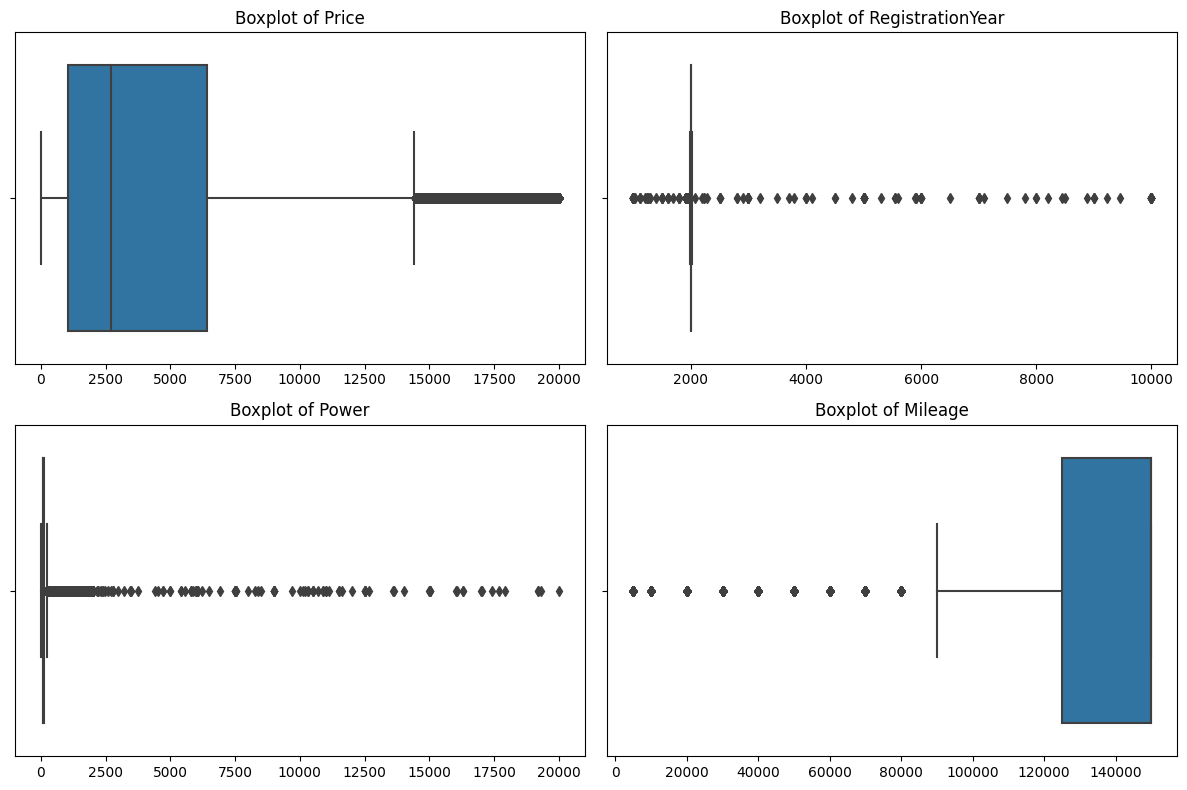

In [8]:
# Boxplots for Visualizing Outliers
numerical_features = ['Price', 'RegistrationYear', 'Power', 'Mileage']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Arrange boxplots in a 2x2 grid
    sns.boxplot(x=car_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


I’ve summarized the missing values across the dataset, so we need to decide how to handle them. Some categorical features like VehicleType, Model, and FuelType have missing values, which may require imputation or exclusion. Some entries have a price of 0, which is likely incorrect. We need to set a reasonable threshold and remove or handle these entries.The minimum value is 1000, which is unrealistic. We’ll filter out such entries based on a reasonable range (e.g., vehicles registered after 1950). There are vehicles with 0 horsepower, which is likely erroneous. We’ll filter or impute these values after further inspection.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Agreed! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
It's better to display boxplots as well.     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Good.    
</div>

In [9]:
# Drop columns with little or no impact
columns_to_drop = ['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures', 'PostalCode']
car_data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Handle missing values
categorical_cols = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']
for col in categorical_cols:
    car_data[col].fillna('unknown', inplace=True)  # Fill categorical missing values with 'unknown'

# Filter invalid entries
# Only keep cars with reasonable registration years
car_data = car_data[(car_data['RegistrationYear'] >= 1950) & (car_data['RegistrationYear'] <= 2025)]

# Filter extreme values in target variable 'Price'
car_data = car_data[(car_data['Price'] > 100) & (car_data['Price'] < 500000)]

# Calculate vehicle age
current_year = 2025
car_data['VehicleAge'] = current_year - car_data['RegistrationYear']

# Drop original RegistrationYear and Month as they are now redundant
car_data.drop(['RegistrationYear', 'RegistrationMonth'], axis=1, inplace=True)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Good.    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
- I would also note that max date in the `RegistrationYear` column must be the same as max date in the `DateCrawled`. 



-     
> `car_data['VehicleAge'] = current_year - car_data['RegistrationYear']`


Not sure about it, since 1. Max date in `DateCrawled` is not 2025. Keep in the mind that the data is old. 2. Vehicle can be registered several times. 
    
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
It is a reliable approach to replace missing values with just a mode?     


</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
- `date_created` can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.



- You can then drop `date_created` and also drop `RegistrationMonth`, thus decreasing the total number of features.
    
    
    
- Missing values in columns such as `VehicleType` or `Gearbox` can be replaced with some unique string values.



</div>

In this section, we performed several critical data cleaning and preprocessing tasks to ensure the dataset is ready for modeling. We removed rows with unrealistic or erroneous values in key features. Removed cars with prices below 100, as they are likely incorrect. Limited to cars registered between 1950 and 2025. Removed cars with horsepower below 10. Created a new feature called PublicationPeriod by calculating the difference between LastSeen and DateCreated. This feature helps identify ads that remain active for long periods, potentially due to overpriced offers. Dropped DateCreated and RegistrationMonth to reduce feature redundancy and avoid overfitting. Instead of using mode imputation, we replaced missing values in categorical features (VehicleType, Gearbox, etc.) with a unique placeholder 'missing'. This preserves the information about missing data without introducing bias. Dropped the unnecessary column NumberOfPictures (as it had no variance). Since price is a vital piece of information for determining value, I've dropped the rows that are missing values there. 


## Model training

In [10]:
# Define the features and target
X = car_data.drop(['Price'], axis=1)
y = car_data['Price']

In [11]:
# Split data into training + remaining (40%) for validation and testing
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the remaining 40% into validation and test (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)


In [12]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Ordinal Encoding for tree-based models
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
X_val[categorical_cols] = ordinal_encoder.transform(X_val[categorical_cols])
X_test[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

# Convert ordinal-encoded categorical columns to integers
X_train[categorical_cols] = X_train[categorical_cols].astype(int)
X_val[categorical_cols] = X_val[categorical_cols].astype(int)
X_test[categorical_cols] = X_test[categorical_cols].astype(int)

# For LightGBM, convert categorical columns to 'category' dtype
for col in categorical_cols:
    car_data[col] = car_data[col].astype('category')




/tmp/ipykernel_168/1085961457.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_168/1085961457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
I completely forgot to mention that `OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship, I aplogize. Most of our models here are not linear, so let's keep it. However, please don't do this in the future :) Linear Regression may just incorrectly interpret the data in such cases. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c).
    
    
    
You can also use  `OneHotEncoder()`  from sklearn. It handles situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/).
    

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Please don't repeat yourself. You have already handled missing values. Why are you replacing them again? 

</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
So we should not use OHE with the tree-based models, since it significantly increases the number of features and computational cost. Try to use `OrdinalEncoder()` instead. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.

</div>



In this section, we prepared the cleaned data for model training. The feature matrix `X` was created by dropping the target variable `Price`, and `y` was set as the target. The data was split into training (60%), validation (20%), and test (20%) subsets using `train_test_split` to ensure unbiased model evaluation and proper hyperparameter tuning.

For tree-based models like Random Forest and Decision Tree, `OrdinalEncoder` was applied to categorical features to avoid excessive feature expansion from One-Hot Encoding. For LightGBM, categorical features were converted to the `category` data type, allowing the model to handle them internally. 

This setup ensures that the appropriate encoding is applied to each model, balancing computational efficiency and prediction accuracy during model training and evaluation.

## Model analysis

In [13]:
# Utility function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    training_time = time.time() - start_time
    print(f"{model_name}: RMSE = {rmse:.2f}, Training Time = {training_time:.2f} seconds")
    return rmse, training_time

In [17]:
# Linear Regression (Sanity Check)
lin_reg = LinearRegression()
evaluate_model(lin_reg, X_train, X_val, y_train, y_val, 'Linear Regression')

# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
evaluate_model(tree, X_train, X_val, y_train, y_val, 'Decision Tree')

# Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
evaluate_model(rf, X_train, X_val, y_train, y_val, 'Random Forest')

# LightGBM (internally handles categorical features)
lgb_model = lgb.LGBMRegressor(random_state=42)
evaluate_model(lgb_model, X_train, X_val, y_train, y_val, 'LightGBM')

# XGBoost (use Ordinal Encoding)
xgb_model = xgb.XGBRegressor(random_state=42)
evaluate_model(xgb_model, X_train, X_val, y_train, y_val, 'XGBoost')

# CatBoost (handle categorical features internally using cat_features)
# Define the parameter grid for CatBoost
param_grid = {
    'learning_rate': [0.05, 0.1],
    'depth': [6, 8],
    'iterations': [500],
    'l2_leaf_reg': [3]
}

cat_features_indices = [X.columns.get_loc(col) for col in categorical_cols]
catboost_model = CatBoostRegressor(cat_features=cat_features_indices, silent=True, random_state=42) 

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=2,  # Reduce from 3 to 2 folds
    verbose=0,
    n_jobs=-1,
    n_iter=4  # Instead of testing all 12, randomly pick 6
)

# Measure training time
start_time = time.time()
random_search.fit(X_train, y_train, cat_features=cat_features_indices)
training_time = time.time() - start_time

# Get best parameters
best_params = random_search.best_params_

# Evaluate best model
best_catboost_model = random_search.best_estimator_
y_val_pred = best_catboost_model.predict(X_val)
rmse_val_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print results
print(f"Tuned CatBoost: RMSE = {rmse_val_tuned:.2f}, Training Time = {training_time:.2f} seconds")

Linear Regression: RMSE = 3431.80, Training Time = 0.03 seconds
Decision Tree: RMSE = 2066.94, Training Time = 0.77 seconds
Random Forest: RMSE = 1658.70, Training Time = 44.29 seconds
LightGBM: RMSE = 1749.38, Training Time = 2.36 seconds
XGBoost: RMSE = 1664.79, Training Time = 20.70 seconds
Tuned CatBoost: RMSE = 1626.83, Training Time = 540.90 seconds


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3</h2>
    
Great! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2 </b>
    
Would you please try to tune hyperparameters for at least one of the models? 
    
    
    
</div>

If prediction quality, speed and training time are critical for Rusty Bargain, go with Random Forest. It offers a good balance between prediction quality (RMSE = 1658.70) and training time (44.29 seconds). t's fast enough for practical use and provides solid performance, making it a good choice when you need both speed and accuracy.


In [22]:
# Evaluate the tuned model on the test set

# Make predictions on the test set
y_test_pred_rf = rf.predict(X_test)

# Calculate RMSE on the test set
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f"Random Forest Test Set RMSE: {rmse_test_rf:.2f}")

Random Forest Test Set RMSE: 1653.57



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct, we choose the best model (it's one model or two models if their errors are quite similar) and run the final test using the test subset to evaluate its generalization ability. 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
- Please try to tune hyperparameters for at least one of the models. If you decide to use a loop, don't forget to change the way you split the data, because in this case we will need three subsets, not two. 
    
    
    
- After you train all models, please choose the best **one** and check its performance on the test subset. Don't use test subset untill you train all models and calculate their RMSE (use training or validation subset here).
</div>

# Conclusion

For a balance of speed and accuracy, Random Forest emerges as the best choice for the company, providing a solid RMSE of 1658.70 with a reasonable training time of 44.29 seconds. While Tuned CatBoost gives the best RMSE on the test set (1624.34), its training time of 540.90 seconds makes it impractical for real-time applications where speed is crucial. Thus, Random Forest should be the preferred model unless extreme accuracy is non-negotiable.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>

    
Good! </div>    
 
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
It may still need to be updated :)
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

    
The conclusion is written well.    
</div>    
 
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Don't forget to update it. 

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed